# Round 1 - Components of Machine Learning

<img src="../../../coursedata/R1_ComponentsML/AMLProblem.png" alt="Drawing" style="width: 600px;"/>

Many machine learning (ML) problems and methods consist of three components: 

1. Data points as the basic (atomic) unit of information. Data points are characterized by features, which are  properties that can be measured (or computed) easily. Besides features, data points are often associated with certain labels that represent some higher-level information or quantity of interest. In contrast to features, labels are difficult to acquire and much of machine learning is about to develop methods that allow to estimate or predict the labels of a data point based on its features.  

2. A hypothesis space (also referred to as a ML model) consisting of computationally feasible predictor functions.

3. A loss function that is used to assess the quality of a particular predictor function. 

To implement ML methods, we need to be able to efficiently **store and manipulate** data and predictor functions.  A quite powerful tool to represent and manipulate data and predictor functions are [matrices and vectors](https://en.wikipedia.org/wiki/Matrix_(mathematics)). 

Indeed, data points can often be characterized by a list of numeric attributes, or "features", $x_{r}$ which can be stacked conveniently into a vector $\mathbf{x}=\big(x_{1},\ldots,x_{n}\big)^{T}$. Moreover, many ML methods (such as linear regression or logistic regression) use predictor functions of the form $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$ with some weight vector $\mathbf{w}$. Note that once we restrict ourselves to linear functions of the form $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$, we can represent a predictor function by the weight vector $\mathbf{w}$. Indeed, given the weight vector $\mathbf{w}$, we can evaluate the predictor function for any feature vector $\mathbf{x}$ as $h(\mathbf{x}) = \mathbf{w}^{T} \mathbf{x}$. 

## Learning goals

In this "warm-up" exercise you will learn how to 

* manipulate matrices and vectors,
* use Python dictionaries to access datasets,
* determine the execution time of code blocks, 
* read in data from various sources such as files or the internet,
* visualize data using scatter plots,
* fit simple functions to data. 

This notebook contains several student tasks which require you to write a few lines of Python code to solve small problems. In particular, you have to fill in the gaps marked as **Student Task**.

## Additional Material 

### Videos

* [Data](https://youtu.be/WWYRH3x7_5M), [Hypothesis Space](https://youtu.be/CDcRfak1Mh4), [Hypothesis Space of Linear Models](https://youtu.be/Mch5hmhVuiA), [Hypothesis Space of Decision Trees](https://youtu.be/0FmaLfjAaRE), [Hypothesis Space of Deep Learning](https://youtu.be/im8mweIrpAM),[Loss Functions](https://www.youtube.com/watch?v=Uv9lihDfsBs&t=4s)

* "Learn Python in 5 Minutes" https://www.youtube.com/watch?v=I2wURDqiXdM

* "Learn How To Use Numpy in 5 Minutes" https://www.youtube.com/watch?v=xECXZ3tyONo

### Tutorials 

* components of ML can be found under [this link](https://arxiv.org/pdf/1910.12387.pdf) 

* Python library `numpy` can be found under [this link](https://hackernoon.com/introduction-to-numpy-1-an-absolute-beginners-guide-to-machine-learning-and-data-science-5d87f13f0d51).

* "Learn the Basics" and "Data Science Tutorial" sections from [this link](https://www.learnpython.org/en/).

* a quick refresher for basic properties of matrices can be found under [this link](http://math.mit.edu/~gs/linearalgebra/linearalgebra5_1-3.pdf)

## Matrices and Vectors
<a id="Q1"></a>

The Python library `numpy` provides implementations of many useful matrix and vector operations such as matrix multiplication or eigenvalue decompositions. **Throughout this course we will represent matrices or vectors consistently using numpy data types ("numpy arrays").** 

The matrix 
\begin{equation}
\mathbf{X}  = \begin{pmatrix} X_{1,1} & X_{1,2}& \ldots & X_{1,n} \\ 
X_{2,1} & X_{2,2}& \ldots & X_{2,n} \\ 
\vdots & \vdots & \vdots & \vdots \\ 
X_{m,1} & X_{m,2} & \ldots & X_{m,n} \end{pmatrix}\in \mathbb{R}^{m \times n}
\end{equation} 
is represented as a numpy array of shape (m,n). 

The vector 
\begin{equation}
\mathbf{x}  = \begin{pmatrix} x_{1} \\ x_{2} \\ \vdots \\ x_{m} \end{pmatrix}\in \mathbb{R}^{m}
\end{equation} 
is represented as a numpy array of shape (m,1). 

<a id='LoadDataset'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Vector and Matrix. 
    
The code snippet below creates a [numpy array](http://cs231n.github.io/python-numpy-tutorial/#numpy-arrays) `X` of shape (2,3) to represent the matrix 
$
\mathbf{X} = \begin{pmatrix} 11 & 12 & 13 \\ 21 & 22 & 23 \end{pmatrix}.\\
$
The entry $X_{1,1}$ is accessed via the Python expression `X[0,0]` since in Python the indexing of arrays starts with $0$ instead of $1$. 
</div>

In [1]:
from IPython.display import display, Math # this is to display mathematical formulas
import numpy as np # use shorthand "np" for the numpy library ("package")

X = np.array([[11,12,13],[21,22,23]]) # Define numpy array

print(" X = \n",X) # print X
print("shape of X ",X.shape) # print X.shape
display(Math(r'$X_{1,1}=%02.2f' % X[0,0])) # print command using formatting to put the value of X[0,0] in place of %02.2f.
display(Math(r'$X_{2,1}=%02.2f' % X[1,0])) # %02.2f. defines the format of the number, e.g. round to two decimals.

 X = 
 [[11 12 13]
 [21 22 23]]
shape of X  (2, 3)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<a id='LoadDataset'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Creating Matrices and Vectors. 
  
The code snippet below demonstrates how to create `numpy` arrays of different shapes. 
Throughout the course, we will consistently use a `numpy` array of shape $(m,n)$ to represent a matrix 
with $m$ rows and $n$ columns. We consider a vector of length $m$ as a matrix with one single column 
which is represented by a `numpy` array of shape $(m,1)$. 

Hints:
* The shape, i.e., the number of rows and columns, of a `numpy` array `B` can be determined with `B.shape`
* Python is case-sensitive, i.e., `X` and `x` are considered as two different variables 
* As soon as you create variables `x = ...` and `y = ...`, these variables will continue to exist also when you progress in this notebook, unless you replace (overwrite) them with something else

</div>

In [29]:
import numpy as np
a = np.array([1,2,3,4,5,6,7,8,9])
print("a= ", a)
print("A shape: ", np.shape(a))
a = a.reshape(-1,1)
np.shape(a)

a=  [1 2 3 4 5 6 7 8 9]
A shape:  (9,)


(9, 1)

In [2]:
# Important libraries to import:
# NumPy: is the fundamental package for matrix computations
# matplotlib.pyplot: provides convenient functions for plotting data 

import numpy as np # use shorthand "np" for the numpy library ("package")


# let's create a vector a of length 9:
a = np.array([1,2,3,4,5,6,7,8,9]).reshape(-1,1) # we define numpy array with integers 1 to 9 and respahe the array from (9,) to (9, 0)
dimension=np.shape(a) # get the shape/dimensions of our array "a"
rows = dimension[0] # get the number of rows of our array
print("now we have a vector a =\n",a) # print text and variable "a"
print("the vector a has", rows, "elements") # print text and variable "rows"
print("the vector is represented by a numpy array of shape", a.shape, "\n") # print text and shape of "a"


B = np.zeros((2,2)) # create a 2 x 2 matrix, denoted B, which contains only zero entries
print("now we have a matrix B = \n",B) # print text and variable "B"
dimension=np.shape(B)      # determine dimensions of matrix B
rows = dimension[0]        # first element of dimension is the number of rows 
cols = dimension[1]        # second element of "dimension" is the number of cols
print("the matrix B has", rows, "rows and", cols, "columns \n") # print text and variables "rows" and "cols"

# You can use the numpy function `np.ones(n)` to generate a vector of ones (e.g. `[1,1,1, ..., 1]`) 

x = np.ones(5).reshape(-1,1)  # initialize numpy array filled with 1's and reshape it from (5,) to (5,1)
print("the vector x =\n", x)  # print text and variable "x"

now we have a vector a =
 [[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
the vector a has 9 elements
the vector is represented by a numpy array of shape (9, 1) 

now we have a matrix B = 
 [[0. 0.]
 [0. 0.]]
the matrix B has 2 rows and 2 columns 

the vector x =
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


<a id='MatrixMult'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Matrix Multiplication. 
  
The code snippet below implements a Python function `C, rows, cols = Matrix_multiplication(A, B)` which reads in two matrices $\mathbf{A}$ and $\mathbf{B}$ and returns the product $\mathbf{C}=\mathbf{A} \mathbf{B}$ along with the number of rows and columns of the resulting matrix. This demonstrates how to declare a function with multiple input and output parameters.
</div>

In [3]:
def Matrix_multiplication(A, B): # Defining the function "Matrix_multiplication" with parameters A and B
    """
    Compute the product A*B of two matrices and determine its shape (nr of rows and columns)
    
    :param A: array-like, shape=(m, n)
    :param B: array-like, shape=(o, p)
    
    :return: The matrix being the result of the multiplication, the number of rows and the number columns 
    """
    #We now construct another matrix H by multiplying the matrices A and B using the function np.dot():
    H = np.dot(A,B) # compute the product of matrices A and B
    shape = H.shape # determine the shape of the product
    
    # A matrix that is the product of two matrices with r1 and r2 rows
    # and c1 and c2 columns will have r1 rows and c2 columns 
    
    rows = shape[0] # get number of rows from shape
    cols = shape[1] # get number of columns from shape
    
    return H, rows, cols

<a id='MatrixOps'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Matrix Operations. 
  
<p>
The code snippet below shows how to use numpy arrays to represent matrices and vectors and how to perform 
certain operations. 
</p>

</div>

In [4]:
C = np.array([[1,4,0],[3,2,5],[6,2,1]]) # create a 3x3 numpy array/matrix
I = np.eye(3) # create a 3x3 identity matrix

print("C = \n",C) # print text and variable "C"
print("I = \n",I) # print text and variable "I"

D, rows, cols = Matrix_multiplication(C,I) # call the function Matrix_multiplication

print("D = C * I = \n",D) # print text and variable "D"
print("\n") # create a line break 


# !!!! remember that indexing starts at 0 in Python !!!! 

secondcol = D[:,1]   # read second column of D into array `secondcol` 
secondrow = D[1,:]   # read second row of D into array `secondrow`

# print the second column of matrix D
print("second column of D =", secondcol) 
# print the second row of matrix D
print("second row of D =", secondrow) 
# create a line break 
print("\n") 

# let us now determine the size of a matrix that 
# is obtained as the product of two other matrices F and G
F = np.array([[1,2],[3,4],[5,6]]) # create a numpy array/matrix

print("now we have a matrix F = \n", F) # print text and variable "F"
print("\n the matrix F has", F.shape[0], "rows and", F.shape[1], "columns\n") # print text and rows and columns of F
print("\n") # create a line break 

G = np.array([[1, 2, 3], [3, 4, 5]]) # Create numpy array/matrix "G"

print("now we have a matrix G = \n", G) # print text and variable G
print("\n the matrix G has", G.shape[0], "rows and", G.shape[1], "columns\n") # print text and rows and columns of G

# what will be the size of F*G ?
H, rows, cols = Matrix_multiplication(F,G) # call the function Matrix_multiplication

print("the product H=F*G is H = \n", H) # print text and variable H
print("\n the matrix H has", rows, "rows and", cols, "columns\n") # print text and rows and columns of H

# In the last step we want to take a look at how to build a 3-dimensional array
# by using the np.array() method

# you can also create a 3 dimensional array by using np.empty, np.zeros etc. 
# and specifying a third parameter e.g. np.zeros((2,3,4))

L = np.array([[[0, 1],[2, 3]], [[4, 5],[6, 7]], [[9,10],[11,12]]]) # Create numpy array/matrix of size 2x2x3

print("L = \n", L) #you can see it as 3 matrices of size 2x2 each

C = 
 [[1 4 0]
 [3 2 5]
 [6 2 1]]
I = 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
D = C * I = 
 [[1. 4. 0.]
 [3. 2. 5.]
 [6. 2. 1.]]


second column of D = [4. 2. 2.]
second row of D = [3. 2. 5.]


now we have a matrix F = 
 [[1 2]
 [3 4]
 [5 6]]

 the matrix F has 3 rows and 2 columns



now we have a matrix G = 
 [[1 2 3]
 [3 4 5]]

 the matrix G has 2 rows and 3 columns

the product H=F*G is H = 
 [[ 7 10 13]
 [15 22 29]
 [23 34 45]]

 the matrix H has 3 rows and 3 columns

L = 
 [[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 9 10]
  [11 12]]]


## Dictionaries in Python

The raw data used in ML methods are typically not directly available as numpy arrays (representing matrices). On the lowest level, digital data is nothing but a (huge) pile of bits. However, some applications involve data that can be conveniently represented using a **Python dictionary**. 
[Dictionaries](https://docs.python.org/3/tutorial/datastructures.html#dictionaries), also known as **associative arrays** are data structures that consist of a collection of key-value pairs. As we will see, Python dictionaries provide a convenient interface to data stored in files or online databases. 

<a id='LoadDataset'></a>
<div class=" alert alert-info">
    <b>Demo "Dictionaries".</b> The code snippet below demonstrates simple use cases of dictionaries in Python. These use cases will be useful when working with datasets loaded using the Python library [scikit-learn](http://scikit-learn.github.io/stable) and/or read in from a file to a [pandas dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).
    
</div>

In [5]:
# Lets define a simple dictionary consisting of three key-value pairs.
# The keys are names of countries from Norhern Europe and the values 
# indicate the capital city for each country. 

C = {'Finland':'Helsinki',
    'Sweden':'Stockholm',
    'Norway':'Oslo'} # initialize dictionary C

print('The type of the variable C is:', type(C))  # print the type of the variable "C"
print(C) # print out the dictionary contents

# Accessing Dictionary Values
print("C['Finland']:", C['Finland']) # prints out "Helsinki"

# If you refer to a key that is not in the dictionary, i.e. print(C['Denmark']), Python raises an exception.

# Adding an entry to an existing dictionary is simply a matter of assigning a new key and value:
C['Denmark'] = 'Copenhagen'   # adds a dictionary entry with key "Denmark" and value "Copenhagen"

print("C['Denmark']:", C['Denmark']) # Print out dictionary value with key "Denmark"
print(C) # print dictionary "C"
# Remember, you can’t treat a dictionary like a list or numpy array, e.g. indices don't work.

# Dictionaries can contain numerical and string values as keys and values:

Population = {'Finland':5500000,
                'Sweden':10000000,
                'Norway':5250000} # Create a dictionary variable "Population"
print("The population of Finland is ", Population['Finland'], " persons") # print the value of dictionary with key "Finland"

Numbers = {3:'prime',
            6:'not prime',
            7:'prime'} # Create a dictionary "Numbers"
print("The number 3 is", Numbers[3]) # print a value of dictionary Numbers with key "3"

The type of the variable C is: <class 'dict'>
{'Finland': 'Helsinki', 'Sweden': 'Stockholm', 'Norway': 'Oslo'}
C['Finland']: Helsinki
C['Denmark']: Copenhagen
{'Finland': 'Helsinki', 'Sweden': 'Stockholm', 'Norway': 'Oslo', 'Denmark': 'Copenhagen'}
The population of Finland is  5500000  persons
The number 3 is prime


<a id='LoadDataset'></a>
<div class=" alert alert-info">
    <b>Demo "Dictionary of Wine Data".</b> The code snippet below demonstrates how to read in a toy dataset using a Python library `sklearn` and store it in a dictionary `wine`. This dataset contains information about several wine samples. Each wine sample is characterized by a set of features (which can be read out using `wine['data']`) and a wine category (which can be read out using `wine['target']`). 

</div>

In [6]:
# Dictionaries can contain vectors/matrices as values

# Loading wine dataset
from sklearn import datasets # import datasets from sklearn
wine = datasets.load_wine() # loading the wine dataset from sklearn datasets

# keys are strings and values are vectors/matrices
X = wine['data']   # read in the value for the key "data"
y = wine['target'] # read in the value for the key "target"

# print out the shape of the vectors/matrices
print('data:\t\t', X.shape, '\nlabels shape:\t', y.shape) # print number of elements along each dimension of "X" and "Y" 
print('------------------------------------------------') # print some dashes
print(wine['feature_names']) # print the feature names in the dataset, key is a string, value is an array of string

data:		 (178, 13) 
labels shape:	 (178,)
------------------------------------------------
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


## Measuring Execution Time

Sometimes it is useful to know how much time your code takes to execute. This is especially useful when you have very large datasets ("Big Data") and you want to evaluate if you can afford running your ML method. Indeed, nowadays you can rent computational infrastructure at an hourly rate [click here](https://aws.amazon.com/pricing/)). Thus, the faster your ML method runs the less you have to pay! 

<a id='MeasureTime'></a>
<div class=" alert alert-info">
    <b>Demo "Computational Complexity".</b> Many ML methods have to cope with limited computational resources such as a limited time budget for carrying out computations. It is therefore important to have a good understanding of the computational complexity of ML methods. One of the most straightforward approaches to measuring the computational complexity of ML methods is to measure their execution time. Below we will go through a simple example on how to measure the execution time of a code block. 

</div>

In [7]:
import time # import standard library time


# lets measure the time it takes us to loop through 10 000 000 values and print a value
start_time = time.time() # save starting time to variable "start_time". Time is saved in seconds.

x = 0 # initialize x as 0
for i in range(10000000): # loop 10000000 times
    x += 1                # Increment x by one each time loop is run 
print('x:', x)            # print x after looping through 10000000 times

end_time = (time.time() - start_time)*1000 # Print the difference in time, multiply by 1000 to get time in milliseconds.

print("--- %s milliseconds ---" % (end_time)) # print the variable "end_time"

x: 10000000
--- 1459.3207836151123 milliseconds ---


<a id="Q3"></a>

## Let's Grab Data!

One of the key components of any machine learning problem (and method) is data. There are many different sources of data such as files stored on a hard-disk or internet databases such as [Wikidata](https://www.wikidata.org/wiki/Wikidata:Main_Page). Another source of data is provided in ready-made Python functions which load specific toy datasets https://scikit-learn.org/stable/datasets/index.html. 


<a id='LoadDataset'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Load Data from File. 

Implement a Python function `X, m, n = LoadData(filename)` which reads in the filename of a CSV file as input parameter. The function should return three output parameters: 
* a numpy array `X` representing the matrix $\mathbf{X} =\big(\mathbf{x}^{(1)},\ldots,\mathbf{x}^{(m)}\big)^{T}$ whose rows are the feature vectors $\mathbf{x}^{(i)} \in \mathbb{R}^{n}$ which are stored in the rows of the CSV file, 
* the sample size $m$ which is the total number of rows in the csv file
* and the number $n$ of features used to characterize each data point. 

</div>

In [13]:
import pandas as pd             # use shorthand "pd" for lib "pandas" which provides methods for 
                                # loading and saving data from and to files 

def LoadData(filename): # define function "LoadData" with one parameter "filename"
    """
    Load the dataframe reading the file with the filename given as a parameter.
    Print the sample size m and the feature length n.

    :input: String path to the file

    :return: numpy array of shape=(m, n), the sample size m and the feature length n    
    """

    df = pd.read_csv(filename) # read in values from a csv file given in variable "filename"
    X = df.values # convert the data frame to numpy array
    print("=================")
    print(X)
    n = X.shape[0]
    m = X.shape[1] 
    print("shape of X is: ", X.shape)
    print('Sample size is m=',m)
    print('Feature length is n=',n)
    # remove the line raise NotImplementedError() before testing your solution and submitting code
    # YOUR CODE HERE
    #raise NotImplementedError()

    return X, m, n # return variables X, m and n

The code snippet below executes the function `LoadData` and performs some tests. 

In [14]:
X, m, n = LoadData("/coursedata/R1_ComponentsML/Data.csv") # call the LoadData function with parameter "Data.csv"
assert X.shape == (600,2), f'Expected dataframe to be of different size than {df.shape}' # Test output shape
print(X[0][0])
np.testing.assert_allclose(X[0][0], 0.47, atol=0.01)



print("Sanity checks passed! Some hidden tests may still fail.")


[[ 0.47143516 -1.19097569]
 [ 1.43270697 -0.3126519 ]
 [-0.72058873  0.88716294]
 ...
 [ 3.16009399  3.83897138]
 [ 3.28939313  3.68964166]
 [ 3.39549918  4.36393359]]
shape of X is:  (600, 2)
Sample size is m= 2
Feature length is n= 600
0.471435163732493
Sanity checks passed! Some hidden tests may still fail.


<a id='LoadDataset'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Loading the Linnerud Dataset. 
 

- Load the [Linnerud](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html#sklearn.datasets.load_linnerud) dataset using the command `linnerud = datasets.load_linnerud()`.
- This dataset consists of $m=20$ datapoints, each datapoint representing an athlete doing some exercise. 
- Each data point is characterized by three features: weight $x_{1}$, waist $x_{2}$ and pulse $x_{3}$ of the athlete. 
- Each data point is characterized by three labels: chins $y_{1}$, situps $y_{2}$ and jumps $y_{3}$.
- store features in a numpy array `X` of shape (20,3) by using the command `X = linnerud['data']`
- store labels in a numpy array `Y` of shape (20,3) using the command `Y = linnerud['target']`
   </div>

In [10]:
# Load the dataset and store data and labels in variables
from sklearn import datasets # import datasets fomr sklearn

linnerud = datasets.load_linnerud()
# remove the line raise NotImplementedError() before testing your solution and submitting code
# YOUR CODE HERE
#raise NotImplementedError()

X = linnerud['data']
# remove the line raise NotImplementedError() before testing your solution and submitting code
# YOUR CODE HERE
#raise NotImplementedError()

print('Shape of X matrix:', X.shape) # print text and shape of variable X
print("Exercise - 20 observations on 3 exercise variables: Chins, Situps and Jumps.") # print text
print('\n') # print new line

# Target also contains three variables, Weight, Waist and Pulse. Here we will use only the weight variable.
Y = linnerud['target']
# remove the line raise NotImplementedError() before testing your solution and submitting code
# YOUR CODE HERE
#raise NotImplementedError()
print('shape of matrix Y:', Y.shape) # print text and shape of variable Y
print("20 data points, each containing values of 3 physiological variables: Weight, Waist and Pulse.") # print text

Shape of X matrix: (20, 3)
Exercise - 20 observations on 3 exercise variables: Chins, Situps and Jumps.


shape of matrix Y: (20, 3)
20 data points, each containing values of 3 physiological variables: Weight, Waist and Pulse.


In [11]:
# Testing below that the loaded data in variable "X" and "Y" is of correct shape.
assert Y.shape == (20, 3), f'Expected matrix to be of different size than {X.shape}'
assert X.shape == (20, 3), f'Expected matrix to be of different size than {Y.shape}'
assert X[0][0] == 5.0, 'Expected value of X[0][0] to be equal to 5'
assert X[3][2] == 37.0, 'Expected value of X[0][0] to be equal to 37'
assert Y[0][0] == 191, 'Expected value of X[0][0] to be equal to 191'
assert Y[3][2] == 62.0, 'Expected value of X[0][0] to be equal to 62'

print("Sanity checks passed!")

Sanity checks passed!


<a id='LoadHKIMap'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Load Data from Helsinki city map service https://kartta.hel.fi/. 
 
The code snippet below demonstrates how to read in information from public geoinformation systems (GIS) using 
the Python package OWSLib (see https://geopython.github.io/OWSLib). After downloading a patch of the map covering Helsinki city area, we save this patch in the file "HelsinkiPatch.jpg" in the course data folder. 
</div>

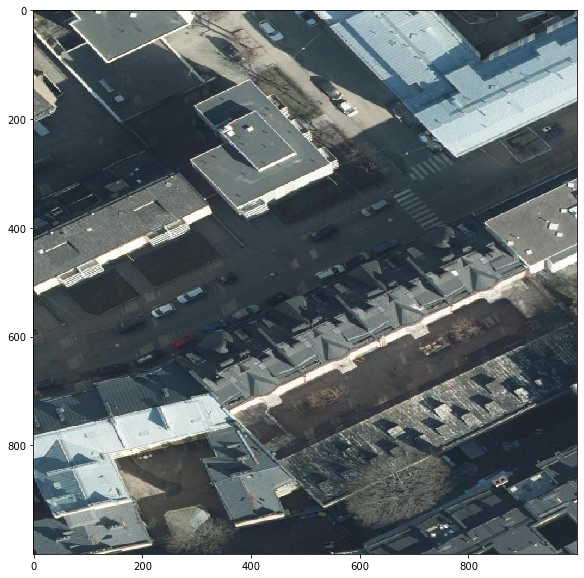

In [12]:
# the library owslib provides functions for accessing geospatial (location) information and services (like kartta.hel.fi)
from owslib.wms import WebMapService # import WebMapService from library owalib.wms
# the library io provides functions for handling data in the form of bitstreams ("raw" data)
import io                            # import library io
# the library numpy provides functions for matrices and vectors 
import numpy as np                   # import library numpy as np
# the library matplotlib.pyplot provides functions for plotting data 
import matplotlib.pyplot as plt      # import library matplotlib.pyplot as plt
# The Python Imaging Library (PIL) provides helpful functions for image processing 
from PIL import Image

wms = WebMapService('https://kartta.hel.fi/ws/geoserver/avoindata/wms', version='1.1.1') # get the helsinki map

cs = 'EPSG:4326'  # select the coordinate system to be used 

# specify region of Helsinki city area

xmin = 24.92      # x-coordinate of bottom-left corner 
ymin = 60.15      # y-coordinate of bottom-left corner 
xmax = 24.99      # x-coordinate of upper-right corner
ymax = 60.20      # y-coordinate of upper-right corner

# divide Helsinki area into 50 by 50 patches
nr_patches_x = 50 
nr_patches_y = 50 

# determine dimensions of one single patch
patch_x = (xmax-xmin)/nr_patches_x  
patch_y = (ymax-ymin)/nr_patches_y

# choose one particular patch and determine the corresponding bounding box 
nr_x = 11
nr_y = 10
patch_box = (xmin+nr_x*patch_x,ymin+nr_y*patch_y,xmin+(nr_x+1)*patch_x,ymin+(nr_y+1)*patch_y) 

# choose a layer from the map service (for a list of available layers visit https://kartta.hel.fi)
ortholayer = 'avoindata:Ortoilmakuva_2019_5cm' 
# set the resolution in number of pixels used in each direction 
res = (1000,1000) 
img = wms.getmap(layers=[ortholayer],srs=cs,bbox=patch_box,size=res,format='image/jpeg',transparent=True) # get the image based on patch parameters (see above linked documentation for more details)

# convert the raw image data into an image object 
pic = Image.open(io.BytesIO(img.read())) 
# convert iamge object into a numpy array 
X = np.array(pic, dtype='uint8') 
# initialize a plot figure of size 10 x 10 inches
fig = plt.figure(figsize=(10,10))  
# add the image to the plot
plt.imshow(X) 
# display the plot
plt.show()

<a id='LoadHKIMapFromFile'></a>
<div class=" alert alert-info">
    <b>Demo "Load JPG File".</b> 
   
   The code snippet below demonstrates how to read in an image from a JPG file. This can be done conveniently using the Python library `PIL` (see https://pillow.readthedocs.io/en/stable/reference/Image.html)
    
</div>

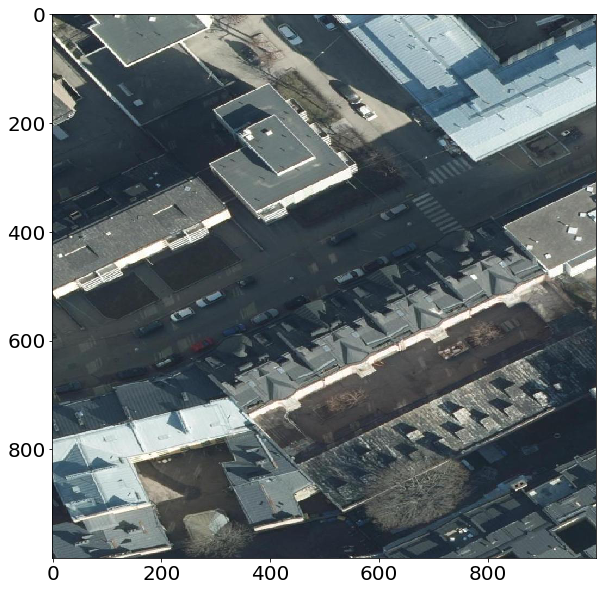

In [36]:
# The Python Imaging Library (PIL) provides helpful functions for image processing 
from PIL import Image # import Image from library PIL

# construct a variable "filename" which contains the relative path of the jpg file 
filename = '/coursedata/R1_ComponentsML/HelsinkiPatch.jpg'

# read in the jpg file 
imagedata=np.asarray(Image.open(filename).convert("RGB"))
# convert image data as a numpy array X of values (0...255)
X = np.array(imagedata, dtype='uint8')   
# create a plot of size 10 by 10 inches 
fig = plt.figure(figsize=(10,10))
# display image stored as RGB values in the numpy array X 
plt.imshow(X)
plt.show()

<a id="Q4"></a>
## Data Visualization - A Picture is Worth A Thousand Words 

We now study how to use the Python library (or package) `matplotlib` (https://matplotlib.org/index.html) to plot data.

Hint: 
- You can find useful tutorials for the `matplotlib` package under [this link](https://matplotlib.org/3.0.2/tutorials/index.html#introductory)


<a id='Scatterplots'></a>

<div class=" alert alert-info">
 
 <b>Demo.</b> Scatterplots. 
 
 
The following code snippet implements the function `axes=ScatterPlots()` that returns an axes object which represents a figure containing two scatterplots: 

- one scatter plot depicting the feature vectors stored in "Data.csv"

- one scatter plot depicting the feature vectors stored in "Data.csv" but divided into 3 subsets corresponding to the first 200, the second 200, and the last 200 rows in "Data.csv". This second scatter plot uses different colors for the (feature vectors from) different subsets.

</div>

In [37]:
def ScatterPlots(): # Define function "ScatterPlots"
    """
    Plot the scatterplot of all the data, then plot the scatterplot of the 3 subsets,
    each one with a different color

    return: axes object used for testing, containing the 2 scatterplots.    
    """

    fig, axes = plt.subplots(1, 2, figsize=(15, 5)) # get figure and axes variables from matplotlib plot
    data, _, _, = LoadData("/coursedata/R1_ComponentsML/Data.csv")  # load data from csv file

    colors = ['r', 'g', 'b'] # initialize a list of letters representing colors

    axes[0].scatter(data[:,0],data[:,1], label='All data') # initialize a scatterplot with one label "All data"
    axes[0].legend() # show the legend on a plot
    axes[1].scatter(data[0:200,0],data[0:200,1], c=colors[0], label='first 200 data points') # initialize another scatterplot with data colored "r" (red)
    axes[1].scatter(data[200:400,0],data[200:400,1], c=colors[1], label='second 200 data points') # add data to second scatter plot with colors "g" (green)
    axes[1].scatter(data[400:600,0],data[400:600,1], c=colors[2], label='third 200 data points') # add data to second scatter plot with colors "b" (blue)
    axes[1].legend() # add a legend to the second scatter plot

    return axes # return axes variable

Let us now try out the function. 

Sample size is m= 2
Feature length is n= 600


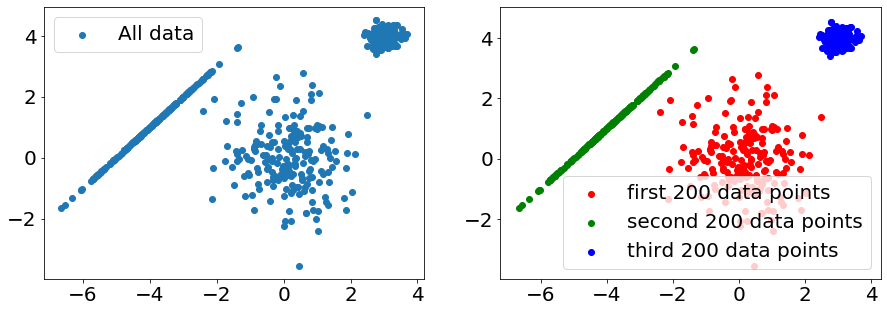

In [38]:
axes = ScatterPlots() # call the ScatterPlots function
plt.show() # show the scatterplots

<a id='PlotLinnerud'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Plot the Linnerud data. 

Create a scatterplot of the `linnerud` dataset. In particular, each data point in the dataset should be depicted as a dot in a diagram whose horizontal represents the body weight and the vertical axis represents the number of chin-ups. 
 </div>

In [39]:
linnerud = datasets.load_linnerud()

# read in the exercise parameters (nr. of chinups ..) for each athlete
Exercise = linnerud['data']
# read in the physiological (weight ...) paramters for each athlete
Physio = linnerud['target']

# we use weights of athletes as feature and store them in numpy array x 
x = Physio[:,0] 
# convert Lbs to Kg
x = x*0.453 
# we use number of chinups as label and store them (for all athletes) in numpy array y
y = Exercise[:,0] 

# reshape from shape (20,) to (20, 1)
x = x.reshape(-1, 1) 
y = y.reshape(-1, 1) 

print(x.shape) # print number of elements along each dimension of x 
print(y.shape) # print number of elements along each dimension of y

(20, 1)
(20, 1)


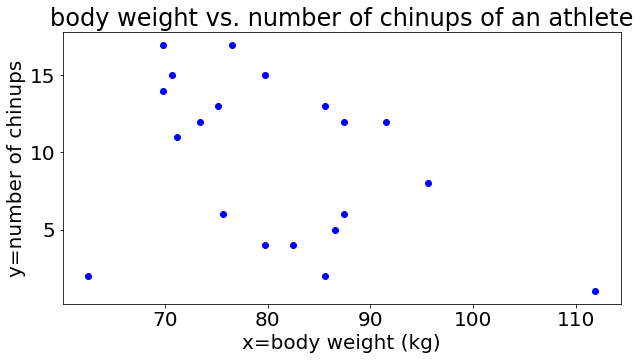

In [40]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.scatter(x,y,c = 'blue')

# remove the line raise NotImplementedError() before testing your solution and submitting code
# YOUR CODE HERE
#raise NotImplementedError()

# set title for the scatterplot
axes.set_title('body weight vs. number of chinups of an athlete')
# set x-axis label for the scatterplot
axes.set_xlabel('x=body weight (kg)') 
# set y-axis label for the scatterplot
axes.set_ylabel('y=number of chinups') 
# show the plot
plt.show() 

In [41]:
# plot tests

# the following two imports are for testing purposes only
from plotchecker import ScatterPlotChecker # for testing purposes
from plotchecker import LinePlotChecker # for testing purposes

# initialize scatterplotchecker
pc = ScatterPlotChecker(axes)
# perform a sanity check on the student code 
np.testing.assert_array_equal(pc.x_data.reshape(-1,1), x, f"The x values for the plot of the scatterplot are wrong")


print("Sanity checks passed! Some hidden tests may still fail.")


Sanity checks passed! Some hidden tests may still fail.


<a id="Q5"></a>

## Learning from Data by Fitting a Model (Curve)

The `Linnerud dataset` consists of data points that represent athletes doing some exercise. We might be interested in how specific properties (or features) of a person affect their performance. Let us try to predict the number of chin-ups that an athlete can do.  

We can formalize this as a machine learning problem. The data points represent athletes who are characterized by the feature $x$ given by the body weight in kg. The quantity of interest (the label) $y$ of a data point is the number of chin-ups the athlete can do. Our goal is to find a predictor function $h(x)$ which takes the bodyweight $x$ as input and outputs a predicted label $\hat{y}$ which estimates the number of chin-ups that the athlete should be able to do. 

Choosing a good predictor $h(x)$ from the space of all possible functions $h(\cdot): \mathbb{R} \rightarrow \mathbb{R}$ is challenging since there are [**so many** of these functions](https://en.wikipedia.org/wiki/Function_of_a_real_variable#Cardinality_of_sets_of_functions_of_a_real_variable). Therefore, we restrict ourselves to the space of linear functions
\begin{equation}
h^{(w)}(x) = w \cdot x. 
\end{equation} 
The set of all of such functions, obtained for different choices for $w$, constitutes the hypothesis space of linear predictors. 
Each function of this **hypothesis space** is characterized by a single number $w \in \mathbb{R}$. Once we specify this number (or weight), we can compute the function value $h^{(w)}(x)$ for any possible feature value $x$. 

<a id='HypothesisDemo'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Hypothesis Space of Linear Predictor Functions.  
    
The code snippet below creates a scatterplot of the `Linnerud` dataset and also plots 
some of the predictor functions from the linear hypothesis space. These predictor functions 
are of the form $h(x) = w \cdot x$ with given weight $w$.

Hint: In this section, we will use the Python library [Scikit-learn (Sklearn)](https://scikit-learn.org/stable/index.html) to fit models to data.

</div>

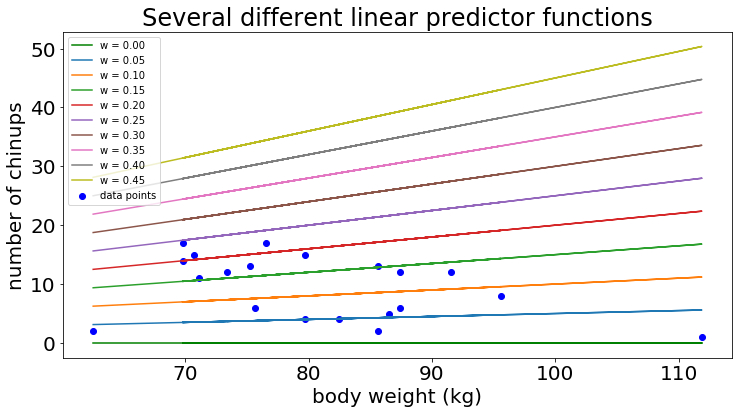

In [42]:
from sklearn import linear_model # import linear_model from scatterplot library

reg = linear_model.LinearRegression(fit_intercept=False) # initialize the linear regression model
reg.fit(x,y) # Fit the linear regression model with variables "x" and "y"

hypothesis_space = [] # initialize and empty list
for i in range(0, 10): # loop over range 0-10
    reg.coef_ = np.array([[i*0.05]]) # get scaled the regression coefficients
    n = reg.predict(x) #make predictions based on the previously defined and fitted regression model
    hypothesis_space.append(n) # append the preditions to "hypothesis_space" list

fig, axes = plt.subplots(1, 1, figsize=(12, 6)) # Initialize subplots and get "fig" and "axes" objects
    

axes.scatter(x, y, color='blue',label="data points") # initialize a scatterplot
axes.plot(x, hypothesis_space[0], color='green',label='w = {:.2f}'.format(0*0.05)) # plot the first item from the "hypothesis_space" list

for i in range(len(hypothesis_space)-1): # loop through the items in "hypothesis_space" list
    y_n = hypothesis_space[i+1] # idea of i+1 is to start from index 1 since we already plotted hypothesis space with index 0 above.
    l = 'w = {:.2f}'.format((i+1)*0.05) # get a formatted string to use in legend
    axes.plot(x, y_n, label=l) # add the item from "hypothesis_space" to the plot

plt.rc('legend', fontsize=10) # update plot fonts
plt.rc('axes', labelsize=20)  # update plot fonts
plt.rc('xtick', labelsize=20) # update plot fonts
plt.rc('ytick', labelsize=20) # update plot fonts
plt.rc('font', size=20)       # update plot fonts

axes.set_title('Several different linear predictor functions') # set plot title
axes.set_xlabel('body weight (kg)') # set x-axis label
axes.set_ylabel('number of chinups') # set y-axis label
axes.legend(loc='upper left') # set location of the legend to show in upper left corner
plt.show()


### Learning the Best Predictor by Fitting a Model

A key idea underlying ML is to choose predictor functions $h(x)$ based on how well they fit historic or training data. For linear predictors, of the form $h(x)=w \cdot x$, the search of a good predictor reduces to the search for a good choice for the weight $w \in \mathbb{R}$ which is just a number. 

To search for a good predictor function $h$, which maps a feature value $x$ to the predicted label $\hat{y}=h(x)$, we need to measure the loss (or error) incurred when the true label is $y$ but the predicted label is $\hat{y}$. There are many different choices for how to define such a loss fucntion. In general, we are free to define the loss function to best suit the application at hand. However, for certain classes of machine learning problems some useful choices for the loss functions have crystalized. For example, if the labels of data points take on numeric values, a widely used choice for the loss function is the squared error loss $(y - \hat{y})^{2}$. 

Using loss functions to measure the quality of a predictor requires the availability of data points for which we know the true label $y$. One option to get labeled data is from historic recordings or experiments. Assume we have some labeled data points $(x^{(1)},y^{(1)}),\ldots,(x^{(m)},y^{(m)})$ consisting of $m$ data points. The $i$th data point has the feature $x^{(i)}$ and the true label $y^{(i)}$. 

We have now all the tools to find the best linear predictor $h(x) = w \cdot x$ by minimizing the empirical risk or average squared error loss 
\begin{equation}
(1/m) \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^{2} = (1/m) \sum_{i=1}^{m} (y^{(i)} - w \cdot x^{(i)})^{2}. 
\end{equation}

<a id='FitRegressionDemo'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Fitting a Linear Model to Data.  

The code snippet below loads features and labels of data points of the `Linnerud`data set and stores them into the numpy arrays `x` and `y`. The $i$th entry of these numpy array is the feature $x^{(i)}$ and true label $y^{(i)}$, respectively, of the $i$th data point. We then use the Python class `LinearRegression` to fit a linear model to this data points. 

A linear model corresponds to the set of linear predictor $h(x) = w \cdot x$ with some weight $w\in \mathbb{R}$. Fitting a linear model means to choose the weight to minimize the average prediction error $y-h(x)$ incurred for some labeled data points. The optimal weight $w_{\rm opt}$ can be computed via the function `LinearRegression.fit()` and the corresponding prediction $\hat{y} = w_{\rm opt} x$ for a data point with feature $x$ can be computed using `LinearRegression.predict()`. 

We plot the data points along with the predictions $\hat{y}^{(i)} = w_{\rm opt} x^{(i)}$ and the prediction errors $y^{(i)} - \hat{y}^{(i)} = y^{(i)} - w_{\rm opt} x^{(i)}$ as red bars. 

</div>

optimal weight w = 0.11143528587026878


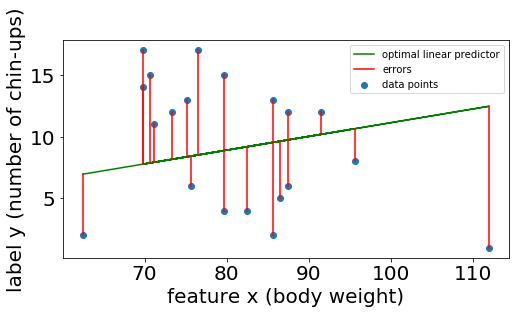

In [43]:
from sklearn import linear_model
from sklearn.datasets import make_regression

# load Linnerud dataset into dictionary `linnerud`
linnerud = datasets.load_linnerud()  
# read out the values for the key 'data' and store them in the numpy array X 
ChinUps = linnerud['data']  
# read out the values for the key 'target' and store them in the numpy array Y 
Weight = linnerud['target']  

# we use the weight (in Lbs) of each athlete as features 
x = Weight.T[0] 
# we use the number of chin ups performed by each athlete as label 
y = ChinUps.T[0] 
x = x.reshape(-1,1)  # convert to numpy array of shape (m,1)
y = y.reshape(-1,1)  # convert to numpy array of shape (m,1)
x = x*0.453 # convert Lbs to Kg

# plot regression dataset

plt.rc('font', size=20) # set plot font

reg = linear_model.LinearRegression(fit_intercept=False) # initialize Linear Regression model
reg.fit(x, y) # fit the linear regression model using "x" and "y" variables
y_pred = reg.predict(x) # make predictions based on fitted model

# ---- You can put code here to answer Quiz question 1. ----
#
# ----------------------------------------------------------


 # print weight of the optimal predictor 
print("optimal weight w =", reg.coef_[0][0])


 # initialize subplots and get "fig" and "axes" objects
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
# initialize a scatterplot with horizontal (vertical) axis representing feature (label) values 
axes.scatter(x, y, label='data points') 
# add the predicted labels "y_pred = h(x)" made by the model to the plot
axes.plot(x, y_pred, color='green', label='optimal linear predictor') 

# indicate error bars

axes.plot((x[0], x[0]), (y[0], y_pred[0]), color='red', label='errors') # add label to legend
for i in range(len(x)-1): # loop through range length of x - 1
    lineXdata = (x[i+1], x[i+1]) # make tuples with same X
    lineYdata = (y[i+1], y_pred[i+1]) # make tuples with different y's
    axes.plot(lineXdata, lineYdata, color='red') # add the red lines to the plot to indicate error distance from our predicted regression model.

axes.legend() # add a legend to the plot
axes.set_xlabel("feature x (body weight)") # set x-axis label
axes.set_ylabel("label y (number of chin-ups)") # set y-axis label
plt.show()

## Adding an Intercept Term 

A simple but useful extension of the linear prediction functions used above is to add an intercept term. In particular, we consider predictor functions of the form 
\begin{equation}
h(x) = w \cdot x + b 
\end{equation}
which involves a weight $w$ and a constant offset $b$. The offset $b$ is sometimes referred to as the "intercept term". The code snippet below finds (or learns) the best choices for the weight $w$ and intercept $b$ in order to minimize the average squared error incurred for a given set of labeled data points $(x^{(i)},y^{(i)})$. 

<a id='FitRegressionDemo'></a>
<div class=" alert alert-info">
    <b>Demo.</b> Fitting a Linear Model with Intercept.  

The code snippet below fits a linear regression model to a set of data points $(x^{(1)},y^{(1)}),\ldots,(x^{(m)},y^{(m)})$ which are generated synthetically (using a random generator) and stored in the vectors `syn_x` and `syn_y`. We use the Python class `linear_model.LinearRegression` to represent the set of linear predictor functions. Using the input argument "fit_intercept=True" includes an intercept term. 
</div>

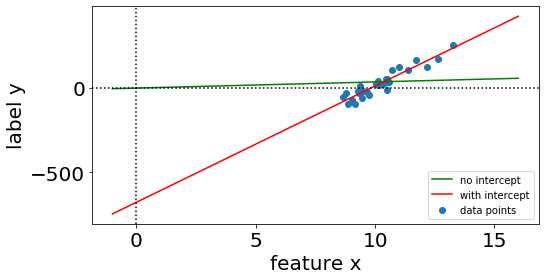

In [44]:
from sklearn import linear_model # import "linear_model" from sklearn
from sklearn.datasets import make_regression # import "make_regression from sklearn.datasets"

# generate some synthetic dataset
syn_x, syn_y = make_regression(n_samples=30, n_features=1, noise=30) # generate data using the imported "make_regression" function
syn_y = syn_y + 10*np.ones(30).reshape(syn_y.shape) # add a 10* identity matrix to data
syn_x = syn_x + 10*np.ones(30).reshape(syn_x.shape) # add a 10* identity matrix to data

# plot regression dataset

plt.rc('font', size=20) # change plot font

# create Linear Regression model without an intercept
reg = linear_model.LinearRegression(fit_intercept=False) 
# fit a linear regression model (without intercept)
reg = reg.fit(syn_x, syn_y) 

# create Linear Regression model using an intercept term 
reg_intercept = linear_model.LinearRegression(fit_intercept=True) 
# fit a linear regression model (with intercept)
reg_intercept = reg_intercept.fit(syn_x, syn_y) 

# create a grid of test feature values  
x_grid = np.linspace(-1, 16, num=100).reshape(-1,1) 
# compute predictions from linear regression model without intercept term 
y_pred = reg.predict(x_grid) 
# compute predictions on test feature values using linear regression model with intercept term 
y_pred_intercept = reg_intercept.predict(x_grid)

fig, axes = plt.subplots(1, 1, figsize=(8, 4)) # initialize subplots and get "fig" and "axes" variables
axes.scatter(syn_x, syn_y, label='data points') # create a scatter plot with the generated synthetic data
axes.plot(x_grid, y_pred, color='green', label='no intercept') # add a line to the plot
axes.plot(x_grid, y_pred_intercept, color='red', label='with intercept') # # add a line to the plot

axes.legend() # add a legend to the plot
axes.set_xlabel("feature x") # add x-axis label to the plot 
axes.set_ylabel("label y") # add y-axis label to the plot
axes.axhline(y=0, color='k',linestyle=':') # add a dotted lien to the plot
axes.axvline(x=0, color='k',linestyle=':') # add a dotted line to the plot
plt.show()

## Take Home Quiz 

Try to answer the following questions by setting the `answer_R1_Q??` variable for each question to the number of the correct answer. For example, if you think that the second answer in the first quiz question is the right one, then set `answer_R1_Q1=2`. 

<a id='QuestionR1_1'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Question R1.1. 

<p> Modify the code in the demo "Fitting a Linear Model to Data" to determine the difference (error) between the predicted value y_pred and the true label y for the first data point (which corresponds to the index 0). Select the correct value (rounded to one decimal) of this error below.</p>

<ol>
  <li>4.6</li>
  <li>-3.8</li>
  <li>5.0</li>
  <li>7.5</li>
</ol> 

</div>

In [46]:
# answer_Q1

answer_R1_Q1  = 1
# remove the line raise NotImplementedError() before testing your solution and submitting code
# YOUR CODE HERE
#raise NotImplementedError()

In [47]:
# this cell is for tests


assert answer_R1_Q1 in [1,2,3,4], '"answer_R2_Q1" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')


Sanity check tests passed!


<a id='QuestionR1_2'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Question R1.2. 
<p>Choose the correct option (1, 2, 3 or 4) that has correct answers to all questions, a, b and c</p>
<p>You can experiment with the code in the demo "Matrix multiplication" and "Matrix Operations".</p>
    

Consider the following cases: 

<p>Case I. Matrix A has 2 rows and 2 columns. Matrix B has 3 rows and 2 columns. </p>
<p>Case II. Matrix A has 2 rows and 2 columns. Matrix B has 2 rows and 2 columns. </p>
<p>Case III. Matrix A has 3 rows and 2 columns. Matrix B has 2 rows and 3 columns. </p>
    
What is the number of rows and columns of the product matrix `A*B` for each of those cases?</p>

<ol>
  <li>Case I: 2 rows and 3 columns, Case II: 2 rows and 2 columns, Case III: 3 rows and 2 columns</li>
  <li>Case I: 3 rows and 2 columns,  Case II: 2 rows and 2 columns, Case III: 3 rows and 3 columns</li>
  <li>Case I: 3 rows and 2 columns,  Case II: 2 rows and 3 columns, Case III: 3 rows and 3 columns</li>
  <li>Case I: The matrices cannot be multiplied  Case II: 2 rows and 2 columns, Case III: 3 rows and 3 columns</li>
</ol> 

</div>

In [48]:
# answer_Q2

answer_R1_Q2 = 4
# remove the line raise NotImplementedError() before testing your solution and submitting code
# YOUR CODE HERE
#raise NotImplementedError()

In [49]:
# this cell is for tests

assert answer_R1_Q2 in [1,2,3,4], '"answer_R2_Q2" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')


Sanity check tests passed!


<a id='QuestionR1_3'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Question R1.3. 

<p>Consider data points having features $\mathbf{x}$ and a numeric label $y$. How can the quality of a predictor function $h(\mathbf{x})$, which delivers a predicted label $\hat{y}=h(\mathbf{x})$ be measured to choose the best predictor function?</p>
<p>You can modify the code snippet below to experiment and find an answer to the question. </p>
<p>**The implementation of the function will not be graded, only the answer "answer_R1_Q3  = ..." is graded.**</p>

<ol>
  <li>Use the difference between our predicted value $\hat{y}$ and true label $y$, i.e: $y - \hat{y}$ and pick the predictor function with the lowest value of loss.</li>
  <li>Use the squared error loss $(y - \hat{y} )^{2}$ and pick the predictor function with the highest value of squared error loss.</li>
  <li>Use the squared error loss $(x - \hat{x})^{2}$ and pick the predictor function with the lowest value of squared error loss.</li>
  <li>Use the squared error loss $(y - \hat{y})^{2}$ and pick the predictor function with the lowest value of the squared error loss.</li>
</ol> 

</div>

In [54]:
from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn import datasets # import datasets fomr sklearn

linnerud = datasets.load_linnerud()  # load Linnerud dataset into dictionary `linnerud`
X = linnerud['data']    # read out feature vectors stored under key 'data' 
Y = linnerud['target']  # read out label values stored under key 'target' 

x = Y.T[0] # weight (in Lbs) for each athlete, .T is used to traspose
y = X.T[0] # number of chin ups for each athlete, .T is used to transpose
x = x.reshape(-1,1)  # convert to numpy array of shape (m,1)
y = y.reshape(-1,1)  # convert to numpy array of shape (m,1)
x = x*0.453 # convert Lbs to Kg

# model 1
reg = linear_model.LinearRegression(fit_intercept=False) # initialize Linear Regression model
reg.fit(x, y) # fir the linear regression model using "x" and "y" variables
y_pred = reg.predict(x) # make predictions based on fitted model

# model 2
reg_intercept = linear_model.LinearRegression(fit_intercept=True) # initialize Linear Regression model
reg_intercept.fit(x, y) # fir the linear regression model using "x" and "y" variables
y_pred_intercept = reg_intercept.predict(x) # make predictions based on fitted model


def squared_error_loss(a, b):
    loss = pow(a - b,2)
    # implement a real loss function here
    # loss = ...
    # YOUR CODE HERE
    #raise NotImplementedError()
    return loss

# Test your loss function here
L = squared_error_loss(y, y_pred)
#print(L)

In [58]:
# answer_Q3

answer_R1_Q3  = 2
# remove the line raise NotImplementedError() before testing your solution and submitting code
# YOUR CODE HERE
#raise NotImplementedError()

In [59]:
# this cell is for tests

assert answer_R1_Q3 in [1,2,3,4], '"answer_R2_Q3" Value should be an integer between 1 and 4.'
print('Sanity check tests passed!')


Sanity check tests passed!


<a id='Sketchboard'></a>
<div class=" alert alert-warning">
    <b>Sketchboard.</b> You can use the code cell below to copy/paste any of the above code snippets and modify them as you wish. 
</div>

In [26]:
## your code playground 

